In [2]:
# !pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=76ce591b7bacb48158a59333d9dad9c98dc9c9e9908c1fa7471941b7d2de3535
  Stored in directory: c:\users\anna_\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking


In [4]:
# !pip install pandas_datareader

In [7]:
# !pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=3e535dd941f3152adc3d6cbd881cffa638efa06d54a9edeaf9aab157e839097d
  Stored in directory: c:\users\anna_\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [34]:
%matplotlib inline
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from pandas_datareader import data as pdr
yf.pdr_override()
from bs4 import BeautifulSoup
import os
import wget

In [12]:
# t = yf.Ticker("BTC-USD")

In [10]:
# t.hist = t.history(period="max")

In [3]:
# crude_oil_ticker = yf.Ticker("CL=F")

In [9]:
# crude_oil_hist_data = crude_oil_ticker.history(period='max')

NameError: name 'crude_oil_ticker' is not defined

In [4]:
# # ссылка на динамику курса USD на сайте ЦБ РФ

# url = "https://cbr.ru/Queries/UniDbQuery/DownloadExcel/98956?Posted=True&so=1&mode=1&VAL_NM_RQ=R01235&From=23.08.2000&To=07.04.2022&FromDate=08%2F23%2F2000&ToDate=04%2F07%2F2022"

In [37]:
# # считываем данные

# usd_exchange_rate = pd.read_excel(wget.download(url))

In [ ]:
# # курс доллара США

# usd_exchange_rate 

In [ ]:
# # ссылка на динамику курса EUR на сайте ЦБ РФ

# url = "https://cbr.ru/Queries/UniDbQuery/DownloadExcel/98956?Posted=True&so=1&mode=1&VAL_NM_RQ=R01239&From=23.08.2000&To=07.04.2022&FromDate=08%2F23%2F2000&ToDate=04%2F07%2F2022"

In [ ]:
# # считываем данные

# eur_exchange_rate = pd.read_excel(wget.download(url))

In [ ]:
# # курс евро

# eur_exchange_rate 

# Задание 1.

Вы - менеджер по продажам в нефтехимической компании. Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании. Ваша компания запускает новый продукт - "Волшебный белый порошок" (ВБП), который по своим свойствам похож на тот, что уже есть на рынке. Ваши клиенты предпочитают формульный подход к ценообразованию. Вам нужно предложить клиентам формулу расчета цены на ВБП. В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.

### Дополнительные вводные:

Продукт производиться из нефти. Один из известных способов производства предполагает что из 16 баррелей нефти сделают одну тонну ВБП, а затраты на производство в районе 400 евро.

In [22]:

# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии) 
customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    }
}
# Скидки
discounts = {'up to 100': 0.01, # 1%
             'up to 300': 0.05, # 5%
             '300 plus': 0.1}   #10%


### Что нужно сделать?

1. Проанализировать имеющиеся данные.
2. Определить базовую формулу цены на условиях EXW (цена на заводе). То есть как бы выглядела цена на исторических данных.
3. Отобразить на графике.
4. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
5. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента… 

### В результате должно быть 3 файла:
1. Ноутбук с расчетами и графиками. 
2. Скрипт, который делает расчет цены для каждого клиента в одном файле
2. Скрипт, который делает расчет цены для каждого клиента в отельном файле

In [5]:
# powder_price - цена ВБП за 1 тонну, RUB
powder_price = 0

# production_costs - производственные затраты, EUR
production_costs = 400

# raw_materials - сырье для производства ВБП, баррель нефти
raw_materials = 16

# oil_price - цена барреля нефти Crude Oil (CL=F), USD
ticker = "CL=F"
oil_price = pdr.get_data_yahoo(ticker, period='max')['Close']

# курс USD/RUB
usdrub_ticker = "RUB=X"
usdrub_exchange_rate = pdr.get_data_yahoo(usdrub_ticker, period='max')['Close']

# курс EUR/RUB
eurrub_ticker = "EURRUB=X"
eurrub_exchange_rate = pdr.get_data_yahoo(eurrub_ticker, period='max')['Close']

# курс USD/CNY
usdcny_ticker = "CNY=X"
usdcny_exchange_rate = pdr.get_data_yahoo(usdcny_ticker, period='max')['Close']

# курс EUR/USD
eurusd_ticker = "EURUSD=X"
eurusd_exchange_rate = pdr.get_data_yahoo(eurusd_ticker, period='max')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
# базовая формула цены на условиях EXW 

powder_price = (production_costs * eurrub_exchange_rate) + (raw_materials * oil_price * usdrub_exchange_rate).dropna()
powder_price

Date
2003-12-01     28436.240057
2003-12-02     28973.732216
2003-12-03     29165.744264
2003-12-04     29180.749122
2003-12-05     28995.562528
                  ...      
2022-04-05    173796.135409
2022-04-06    166177.231170
2022-04-07    165012.836043
2022-04-08    159002.652815
2022-04-11    156835.748491
Name: Close, Length: 4753, dtype: float64

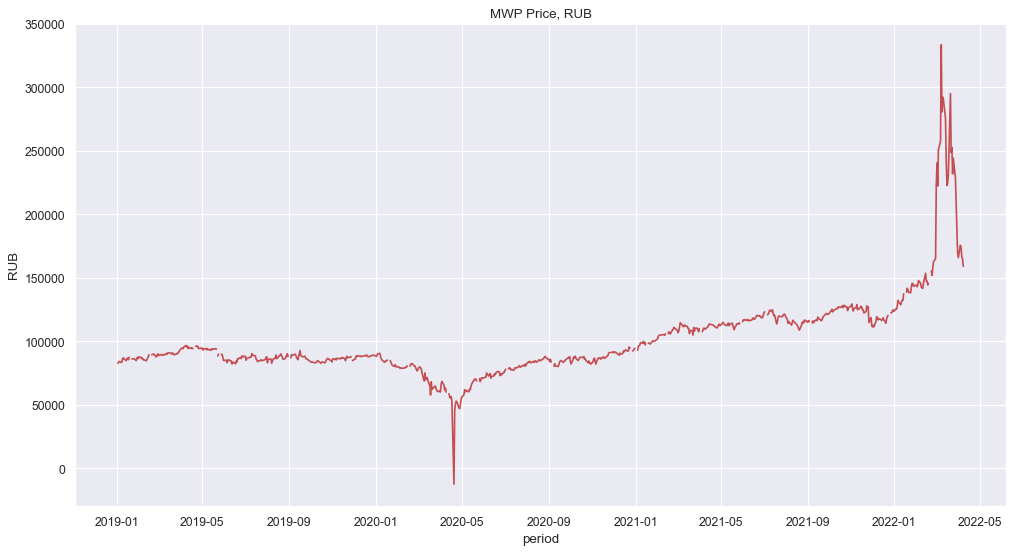

In [9]:
# построение графика, базовая цена за каждый день (период с '2019-01-01' по '2022-04-08')

plt.figure(figsize=(15, 8), dpi=80)
plt.plot(powder_price['2019-01-01':'2022-04-08'], color='r')
plt.title('MWP Price, RUB')
plt.xlabel('period')
plt.ylabel('RUB')
plt.show()

In [10]:
# создаем DataFrame с котировками и ценами ВБП для разных покупателей за каждый день

data_df = pd.concat([oil_price, eurusd_exchange_rate, usdcny_exchange_rate], axis=1, join='inner')
data_df.columns = ['oil_price', 'eurusd', 'usdcny']
data_df['powder_price_euro'] = production_costs + (raw_materials * oil_price / eurusd_exchange_rate)
data_df['powder_price_cny'] = (production_costs * eurusd_exchange_rate + (raw_materials * oil_price )) * usdcny_exchange_rate

In [11]:
# создаем копию DataFrame, чтобы потом выполнять преобразования, не меняя основной DataFrame

data_df_copy = data_df.copy()

In [12]:
# расчет среднемесячной цены

monthly_resampled_data = data_df_copy.resample('M').mean()
monthly_resampled_data.loc['2019-01-01':'2022-04-08']

,oil_price,eurusd,usdcny,powder_price_euro,powder_price_cny
Date,,,,,
2019-01-31,51.550476,1.142495,6.796000,1121.944242,8709.784412
2019-02-28,54.980526,1.135692,6.736758,1174.593106,8986.205579
2019-03-31,58.168095,1.130985,6.711491,1222.907994,9282.575806
2019-04-30,63.870953,1.123487,6.714729,1309.620216,9879.562702
2019-05-31,60.839048,1.118813,6.841962,1270.003236,9720.808852
2019-06-30,54.706500,1.129002,6.899685,1175.176009,9154.434150
2019-07-31,57.546364,1.122404,6.876505,1220.319329,9418.798901
2019-08-31,54.844091,1.113163,7.050036,1188.358167,9325.868398
2019-09-30,56.967000,1.101487,7.115385,1227.446596,9619.913702


In [13]:
# расчет скользящей средней цены (интервал 3 месяца)

moving_avg_data = data_df_copy.resample('M').mean().rolling(3, center=True).mean()
moving_avg_data.loc['2019-01-01':'2022-04-08']

,oil_price,eurusd,usdcny,powder_price_euro,powder_price_cny
Date,,,,,
2019-01-31,51.769457,1.138583,6.808088,1127.561794,8736.752343
2019-02-28,54.899699,1.136390,6.748083,1173.148447,8992.855265
2019-03-31,59.006525,1.130054,6.720992,1235.707105,9382.781362
2019-04-30,60.959365,1.124428,6.756060,1267.510482,9627.649120
2019-05-31,59.805500,1.123768,6.818792,1251.599821,9584.935235
2019-06-30,57.697304,1.123406,6.872717,1221.832858,9431.347301
2019-07-31,55.698985,1.121523,6.942075,1194.617835,9299.700483
2019-08-31,56.452485,1.112351,7.013975,1212.041364,9454.860334
2019-09-30,55.272248,1.106496,7.088267,1199.285790,9405.723433


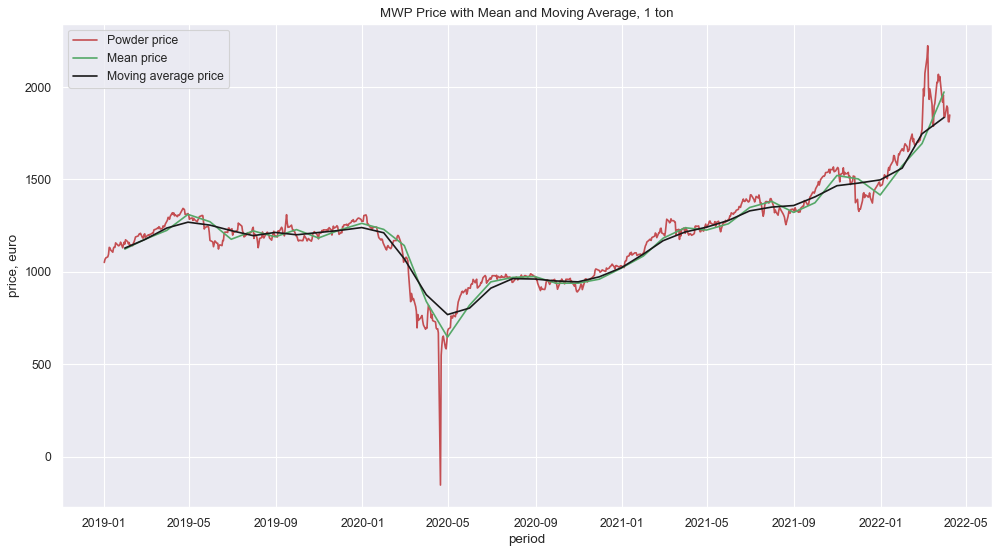

In [14]:
# построим график цены со средней и скользящей средней (валюта "евро")

plt.figure(figsize=(15, 8), dpi=80)
plt.plot(data_df_copy.powder_price_euro['2019-01-01':'2022-04-08'], label='Powder price', color='r')
plt.plot(monthly_resampled_data.powder_price_euro['2019-01-01':'2022-04-08'], label='Mean price', color='g')
plt.plot(moving_avg_data.powder_price_euro['2019-01-01':'2022-04-08'], label='Moving average price', color='k')
plt.title('MWP Price with Mean and Moving Average, 1 ton')
plt.xlabel('period')
plt.ylabel('price, euro')
plt.legend()
plt.show()

In [70]:
# функция для определения расходов на логистику и скидки

def get_logcosts_discount(client_info):
    # в зависимости от локации клиента расходы на логистику разные
    if client_info.get('location') == 'EU':
        logcosts = EU_LOGISTIC_COST_EUR
    elif client_info.get('location') == 'CN':
        logcosts = CN_LOGISTIC_COST_USD
    # в зависимости от кол-ва приобретенного ВБП применяется система скидок
    if client_info.get('volumes') < 100:
        discount = 0.01
    elif 100 <= client_info.get('volumes') < 300:
        discount = 0.05
    elif client_info.get('volumes') >= 300:
        discount = 0.1
    return {'logistic_costs':logcosts, 'discount':discount, 'location':client_info.get('location')}

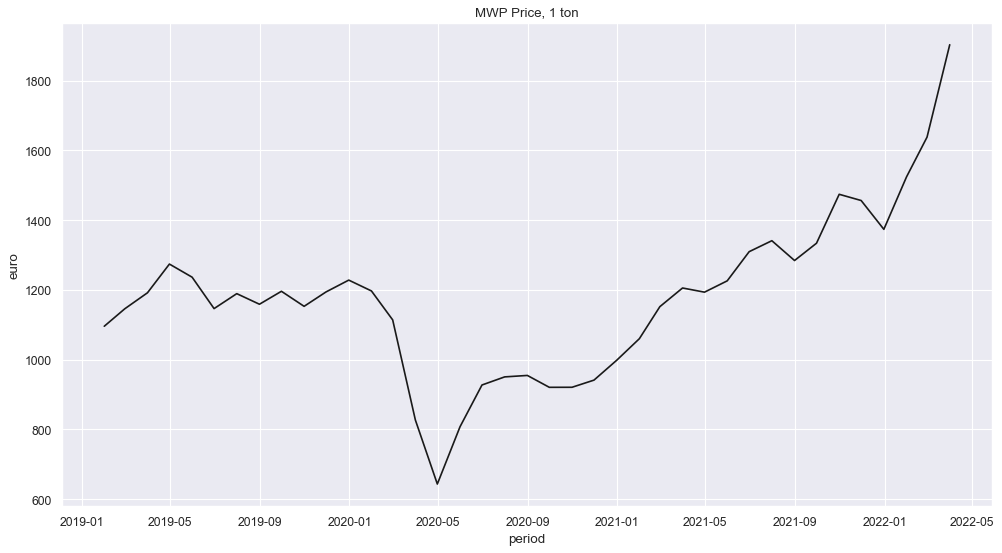

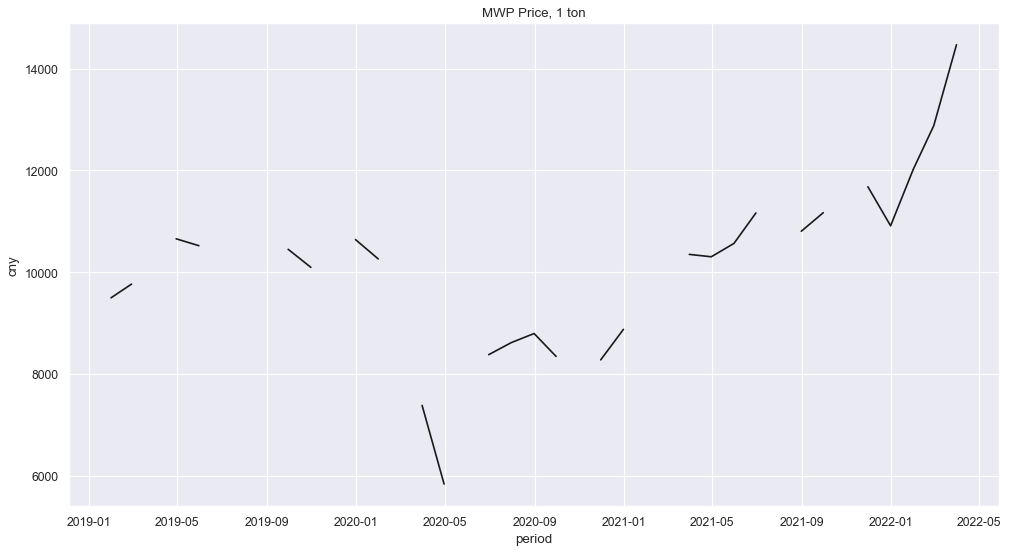

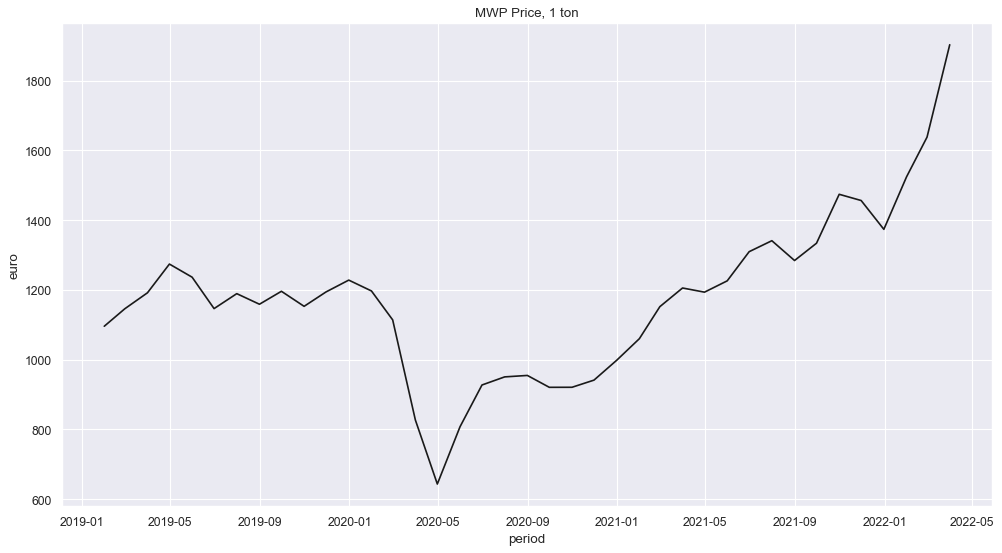

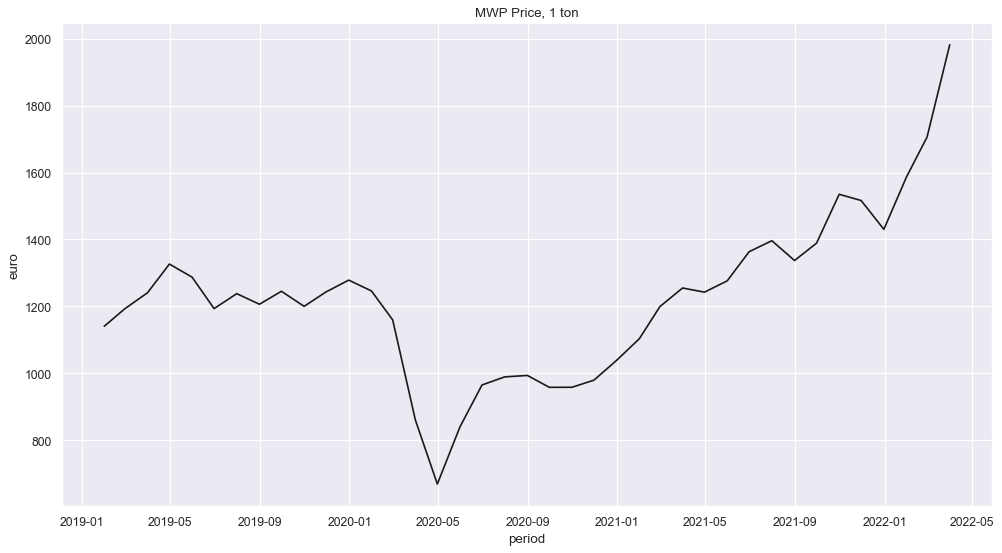

In [66]:
# основной скрипт

for client, client_info in customers.items():
    # сохраняем в переменную log_discnt информацию о клиентах, к которым применена функция
    log_discnt = get_logcosts_discount(client_info)
    # если клиент предпочитает расчет среднемесячной цены, то испольщуем DataFrame "monthly_resampled_data"
    if client_info.get('comment') == 'monthly':
        full_price_df = monthly_resampled_data.copy()
    # если клиент предпочитает расчет скользящей средней цены, то испольщуем DataFrame "moving_avg_data"
    elif client_info.get('comment') == 'moving average':
        full_price_df = moving_avg_data.copy()
    
    # добавляем в DataFrame столбцы с расходами на логистику и примененной скидкой
    full_price_df['logistic_costs'] = log_discnt.get('logistic_costs')
    full_price_df['discount'] = log_discnt.get('discount')
    # в зависимости от страны клиента валюта разная, окончательный расчет цены отличается
    if client_info.get('location') == 'EU':
        currency = 'euro'
        # добавляем столбец с окончательной ценой на ВБП
        full_price_df['powder_final_price'] = full_price_df.powder_price_euro.mul(1-full_price_df.discount).add(full_price_df.logistic_costs)
    elif client_info.get('location') == 'CN':
        currency = 'cny'
        # добавляем столбец с окончательной ценой на ВБП
        full_price_df['powder_final_price'] = full_price_df.powder_price_cny.mul(1-full_price_df.discount).add(full_price_df.logistic_costs.mul(usdcny_exchange_rate))
    
    # строим графики
    plt.figure(figsize=(15, 8), dpi=80)
    plt.plot(full_price_df.powder_final_price['2019-01-01':'2022-04-08'], color='k')
    plt.title('MWP Price, 1 ton')
    plt.xlabel('period')
    plt.ylabel(currency)
    plt.savefig(f'{client}_plot.png')
    writer = pd.ExcelWriter(f'Price_calculation_for_{client}.xlsx', engine = 'xlsxwriter')
    full_price_df.to_excel(writer, sheet_name='PriceCalculation')
    worksheet = writer.sheets['PriceCalculation']
    worksheet.insert_image('K2', f'{client}_plot.png')
    writer.save()
    os.remove(f'{client}_plot.png')

In [73]:
# запись в один файл, но на нескольких листах

for client, client_info in customers.items():
    # сохраняем в переменную log_discnt информацию о клиентах, к которым применена функция
    log_discnt = get_logcosts_discount(client_info)
    # если клиент предпочитает расчет среднемесячной цены, то испольщуем DataFrame "monthly_resampled_data"
    if client_info.get('comment') == 'monthly':
        full_price_df = monthly_resampled_data.copy()
    # если клиент предпочитает расчет скользящей средней цены, то испольщуем DataFrame "moving_avg_data"
    elif client_info.get('comment') == 'moving average':
        full_price_df = moving_avg_data.copy()
    
    # добавляем в DataFrame столбцы с расходами на логистику и примененной скидкой
    full_price_df['logistic_costs'] = log_discnt.get('logistic_costs')
    full_price_df['discount'] = log_discnt.get('discount')
    # в зависимости от страны клиента валюта разная, окончательный расчет цены отличается
    if client_info.get('location') == 'EU':
        currency = 'euro'
        # добавляем столбец с окончательной ценой на ВБП
        full_price_df['powder_final_price'] = full_price_df.powder_price_euro.mul(1-full_price_df.discount).add(full_price_df.logistic_costs)
    elif client_info.get('location') == 'CN':
        currency = 'cny'
        # добавляем столбец с окончательной ценой на ВБП
        full_price_df['powder_final_price'] = full_price_df.powder_price_cny.mul(1-full_price_df.discount).add(full_price_df.logistic_costs.mul(usdcny_exchange_rate))
        
    writer = pd.ExcelWriter(f'Price_calculation.xlsx', engine = 'xlsxwriter')
    for client in customers.keys():
        full_price_df.to_excel(writer, sheet_name=client)
    writer.save()

# Задание 2. 

Клиенты согласились на ваше предложение. 
Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. 
Важный момент: данные для расчета скрипт должен подтягивать сам.

В результате должно быть 3 файла
1. Ноутбук с расчетами и графиками (чтобы данные подтягивались туда)
2. Скрипт, который делает расчет цены для клиента (чтобы данные подтягивались туда сами)

In [ ]:
# 

# Задание 3. 
К вам пришел новый клиент из России. Который использует продукт А и готов регулярно закупать ВБП для того, чтобы не быть привязанным к одному поставщику. Клиент готов забирать ВБП с завода самостоятельно.
1. На основе тех данных, которые уже есть предложите цену новому клиенту. 
2. Подготовьте скрипт, который будет использовать курс публикуемый на <a href='http://www.cbr.ru/currency_base/dynamics/'> сайте ЦБ РФ</a>.


In [53]:
# ссылка на динамику курса USD на сайте ЦБ РФ

url = "https://cbr.ru/Queries/UniDbQuery/DownloadExcel/98956?Posted=True&so=1&mode=1&VAL_NM_RQ=R01235&From=23.08.2000&To=07.04.2022&FromDate=08%2F23%2F2000&ToDate=04%2F07%2F2022"

In [54]:
# считываем данные

usd_exchange_rate = pd.read_excel(wget.download(url))

100% [............................................................................] 129266 / 129266

C:\Users\anna_\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [55]:
# курс доллара США

usdrub_rate = usd_exchange_rate.set_index('data')['curs'] 

In [56]:
# ссылка на динамику курса EUR на сайте ЦБ РФ

url = "https://cbr.ru/Queries/UniDbQuery/DownloadExcel/98956?Posted=True&so=1&mode=1&VAL_NM_RQ=R01239&From=23.08.2000&To=07.04.2022&FromDate=08%2F23%2F2000&ToDate=04%2F07%2F2022"

In [57]:
# считываем данные

eur_exchange_rate = pd.read_excel(wget.download(url))

100% [............................................................................] 129884 / 129884

In [58]:
# курс евро

eurrub_rate = eur_exchange_rate.set_index('data')['curs']

In [60]:
# базовая формула цены на условиях EXW 

powder_price = (production_costs * eurrub_rate) + (raw_materials * oil_price * usdrub_rate)
powder_price['2019-01-01':'2022-04-08']

2019-01-10     87206.014644
2019-01-11     86073.531283
2019-01-12              NaN
2019-01-15     86849.682576
2019-01-16     86924.872194
                  ...      
2022-04-01    169478.490224
2022-04-02              NaN
2022-04-05    173325.481527
2022-04-06    165026.971837
2022-04-07    163147.327763
Length: 798, dtype: float64

# Задание 4. 

* Подумайте, как можно проверить корректность работы алгоритма? 
* Какие возможны ошибки?
* Придумайте тесты для проверки возможных ошибок алгоритма
* Интергрируйте их в свои скрипты в виде исключений


In [ ]:
# 

# Задание 5.

Вы решили пойти в отпуск на время вашего отсутствия вас будет заменять коллега. Он будет заниматься рассчетом цен для клиентов. Чтобы ему было проще вам нужно завернуть ваши скрипты в модуль, который будет запускать у себя коллега.

* Создайте модуль, который можно запускать в ноутбуке подкладывая в ту же директорию
* Хорошенько задокументируйте ВСЁ, но помните о PEP8

In [ ]:
# import yourpackage

# Задание 6. 

Ваши коллеги узнали, что вы быстро рассчитываете цены для формульных контрактов, и решили использовать такую же практику для своих продуктов и клиентов. Вам нужно создать пакет, чтобы его было проще устанавливать и использовать.

* Создайте отдельный пакет, который можно устанавливать с помощью pip 
* В пакете должны быть реализованы функции для рассчета цен по формульным контрактам
* Выложите пакет в репозиторий

In [ ]:
# !pip install yourpackage
# import yourpackage